In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
plt.style.use('ggplot')
%matplotlib inline

from scipy.stats import chi2

# Распределение $\chi^2$

Для проверки центральной предельной теоремы, рассмотрим [распределение $\chi^2$](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82)

Сгенерируем из него выборку размером 1000 элементов, с числом степеней свободы $k=5$

In [2]:
# обозначим константы
SIZE = 1000
k = 5
# зафиксируем распределение
chi = chi2(k)
# зададим область определения данной функции распределения
x = np.linspace(chi.ppf(0.01), chi.ppf(0.99), SIZE) 

In [3]:
# генерируем выборку размера 1000
rv = chi.rvs(size=SIZE)

Построем гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения

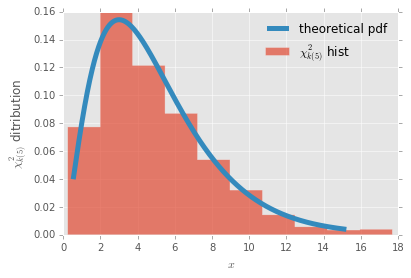

In [4]:
plt.hist(rv, normed=True, label='$\chi^2_{k(5)}$ hist', histtype='stepfilled', alpha=0.7)
# построим теоретическую плотность распределения
pdf = chi.pdf(x)
plt.plot(x, pdf, linewidth=5, label='theoretical pdf')
# подпишем оси
plt.ylabel('$\chi^2_{k(5)}$ ditribution')
plt.xlabel('$x$')
plt.legend(loc='upper right', frameon=False)

In [5]:
def get_dis_mean(n):
    """ Функция генерирует 1000 выборок размером n и возвращает список их средних значений """
    return [chi.rvs(size=n).mean() for i in range(SIZE)]

Для распределения $\chi^2$, математическое ожидание равно $k$, а дисперсия $2k$

In [6]:
def norm_param(n):
    """ Функция возвращает параметры для нормального распределения """
    return k, math.sqrt((2. * k / n))

In [7]:
def plotter(n):
    """ Функция строит гистограмму распределения, и плотность соотвествующего нормального распределения """
    plt.hist(get_dis_mean(n), normed=True, label='hist $n=%d$' % n, histtype='stepfilled', alpha=0.7)
    pdf = sts.norm(*norm_param(n)).pdf(x)
    plt.plot(x, pdf, linewidth=5, label='normal pdf')
    # подпишем оси
    plt.title('N = %d' % n)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend(loc='upper right', frameon=False)


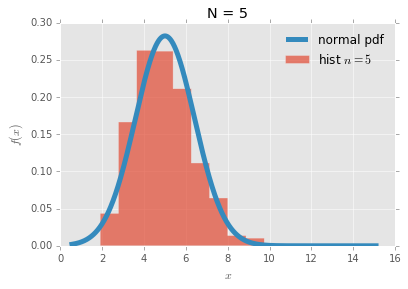

In [8]:
plotter(5)

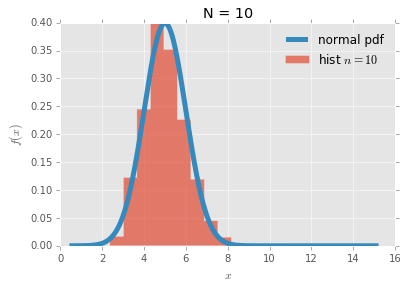

In [9]:
plotter(10)

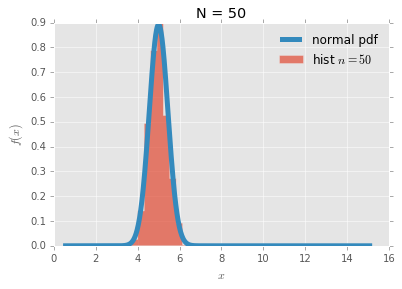

In [10]:
plotter(50)

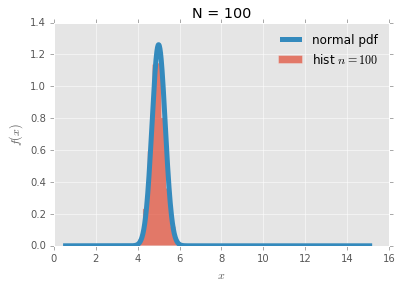

In [11]:
plotter(100)

### Выводы

- Из графиков видно, что распределение средних занчений выборок, достаточно близко описывается нормальным распределением.
- При увеличении числа элементов в выборке, точность её нормальной аппроксимации увеличивается.